In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon Sale Report.csv")
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Week,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,Saturday,April
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,Saturday,April
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Other,Saturday,April
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,Saturday,April
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,Other,Saturday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121138,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False,Other,Tuesday,May
121139,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False,Other,Tuesday,May
121140,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False,Other,Tuesday,May
121141,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False,Other,Tuesday,May


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121143 entries, 0 to 121142
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            121143 non-null  object 
 1   Date                121143 non-null  object 
 2   Status              121143 non-null  object 
 3   Fulfilment          121143 non-null  object 
 4   Sales Channel       121143 non-null  object 
 5   ship-service-level  121143 non-null  object 
 6   Category            121143 non-null  object 
 7   Size                121143 non-null  object 
 8   Courier Status      121143 non-null  object 
 9   Qty                 121143 non-null  int64  
 10  currency            121143 non-null  object 
 11  Amount              121143 non-null  float64
 12  ship-city           121143 non-null  object 
 13  ship-state          121143 non-null  object 
 14  ship-postal-code    121143 non-null  int64  
 15  ship-country        121143 non-nul

In [4]:
df.dropna(inplace=True)
df.to_csv("Amazon Sale Report.csv", index=False)

In [5]:
df["ship-postal-code"] = df["ship-postal-code"].astype("int")

In [6]:


# Converting 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extracting the day name and month name
df["Week"] = df["Date"].dt.day_name()  # Day name
df["Month"] = df["Date"].dt.month_name()  # Month name

In [7]:
df.to_csv("Amazon Sale Report.csv", index=False)

In [8]:
df.describe()

,Date,Qty,Amount,ship-postal-code
count,121143,121143.000000,121143.000000,121143.000000
mean,2022-05-12 12:11:22.182214144,0.961252,648.576874,463623.724507
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,2022-06-04 00:00:00,1.000000,788.000000,600020.000000
max,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,NaN,0.214276,281.196896,191301.588170


In [9]:
df.describe(include="object")

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by,Week,Month
count,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143
unique,112861,12,2,1,2,9,11,3,1,8697,68,1,2,7,4
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Other,Sunday,April
freq,12,77589,83629,121143,82713,47038,20965,109458,121143,10675,21084,121143,83629,18495,46049


#Most of the people buy M-Size Tshirt in this data

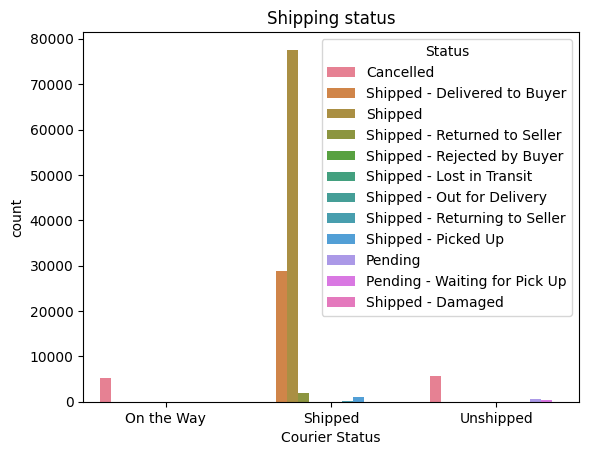

In [10]:
sns.countplot(x="Courier Status", data= df, hue="Status")
plt.title("Shipping status")
plt.show()

#Majority to the order are shipping through The couiers

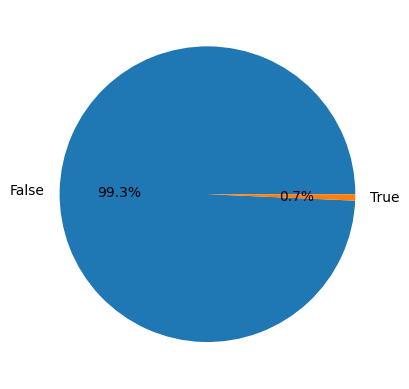

In [11]:
check_b2b=df["B2B"].value_counts()
plt.pie(check_b2b, labels=check_b2b.index, autopct="%1.1f%%")
plt.show()

#Most of the case retail is a buyer and whole saler is only 0.7% buyer

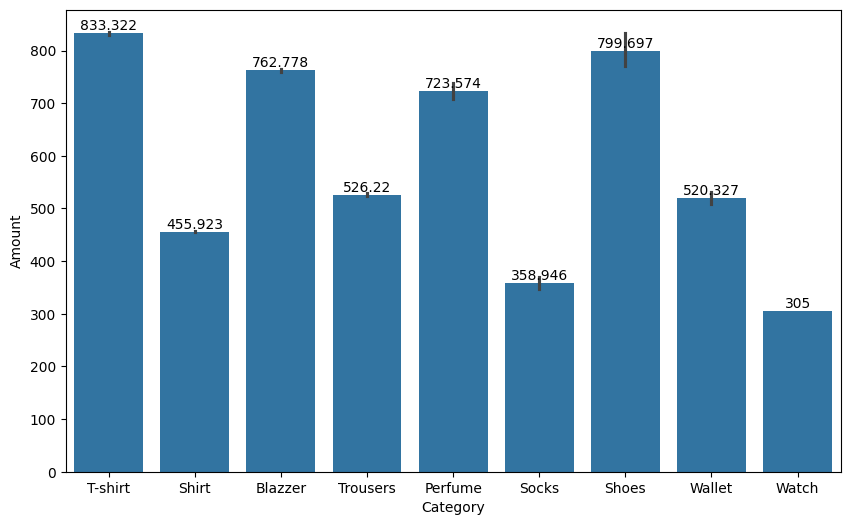

In [12]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Category", y="Amount", data=df)
ax.bar_label(ax.containers[0])
plt.show()

#The hightest Amount of Tshirt and The Lowest Amount of Watch

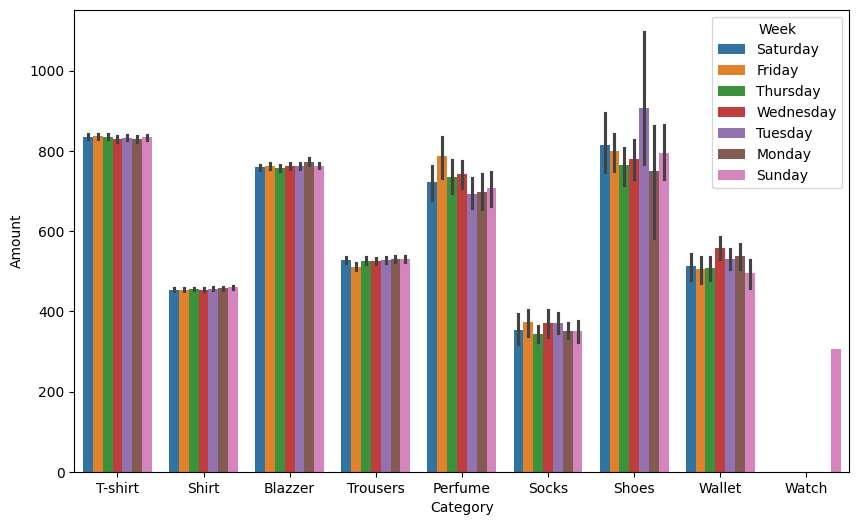

In [13]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Category", y="Amount", data=df, hue="Week")
plt.show()

#Shoes is distribution in the hight amount of tuesday  and watch is the lowest amount of sunday

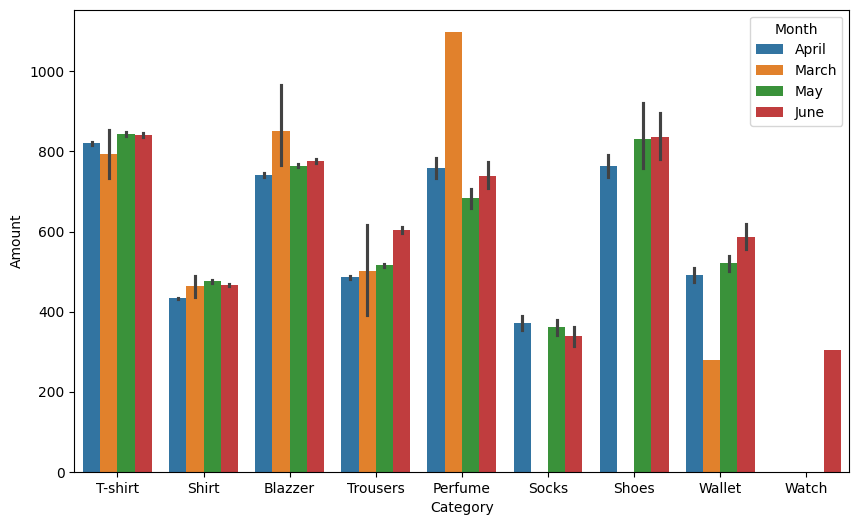

In [14]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Category", y="Amount", data=df, hue="Month")
plt.show()

#Perfume is distribution in the highest price of March month and watch is distribution in the lowest price of June month

# The list of all Columns

In [15]:
sns.set(style="whitegrid")

numerical_cols = ["Qty", "ship-postal-code"]
categorical_cols = ["Fulfilment", "Sales Chennel", "ship-service-level","Category","Courier Status","ship-city","ship-state", "ship-country",
                   "fulfilled-by","Month","Week"]

# the count plot of all Categorical_cols

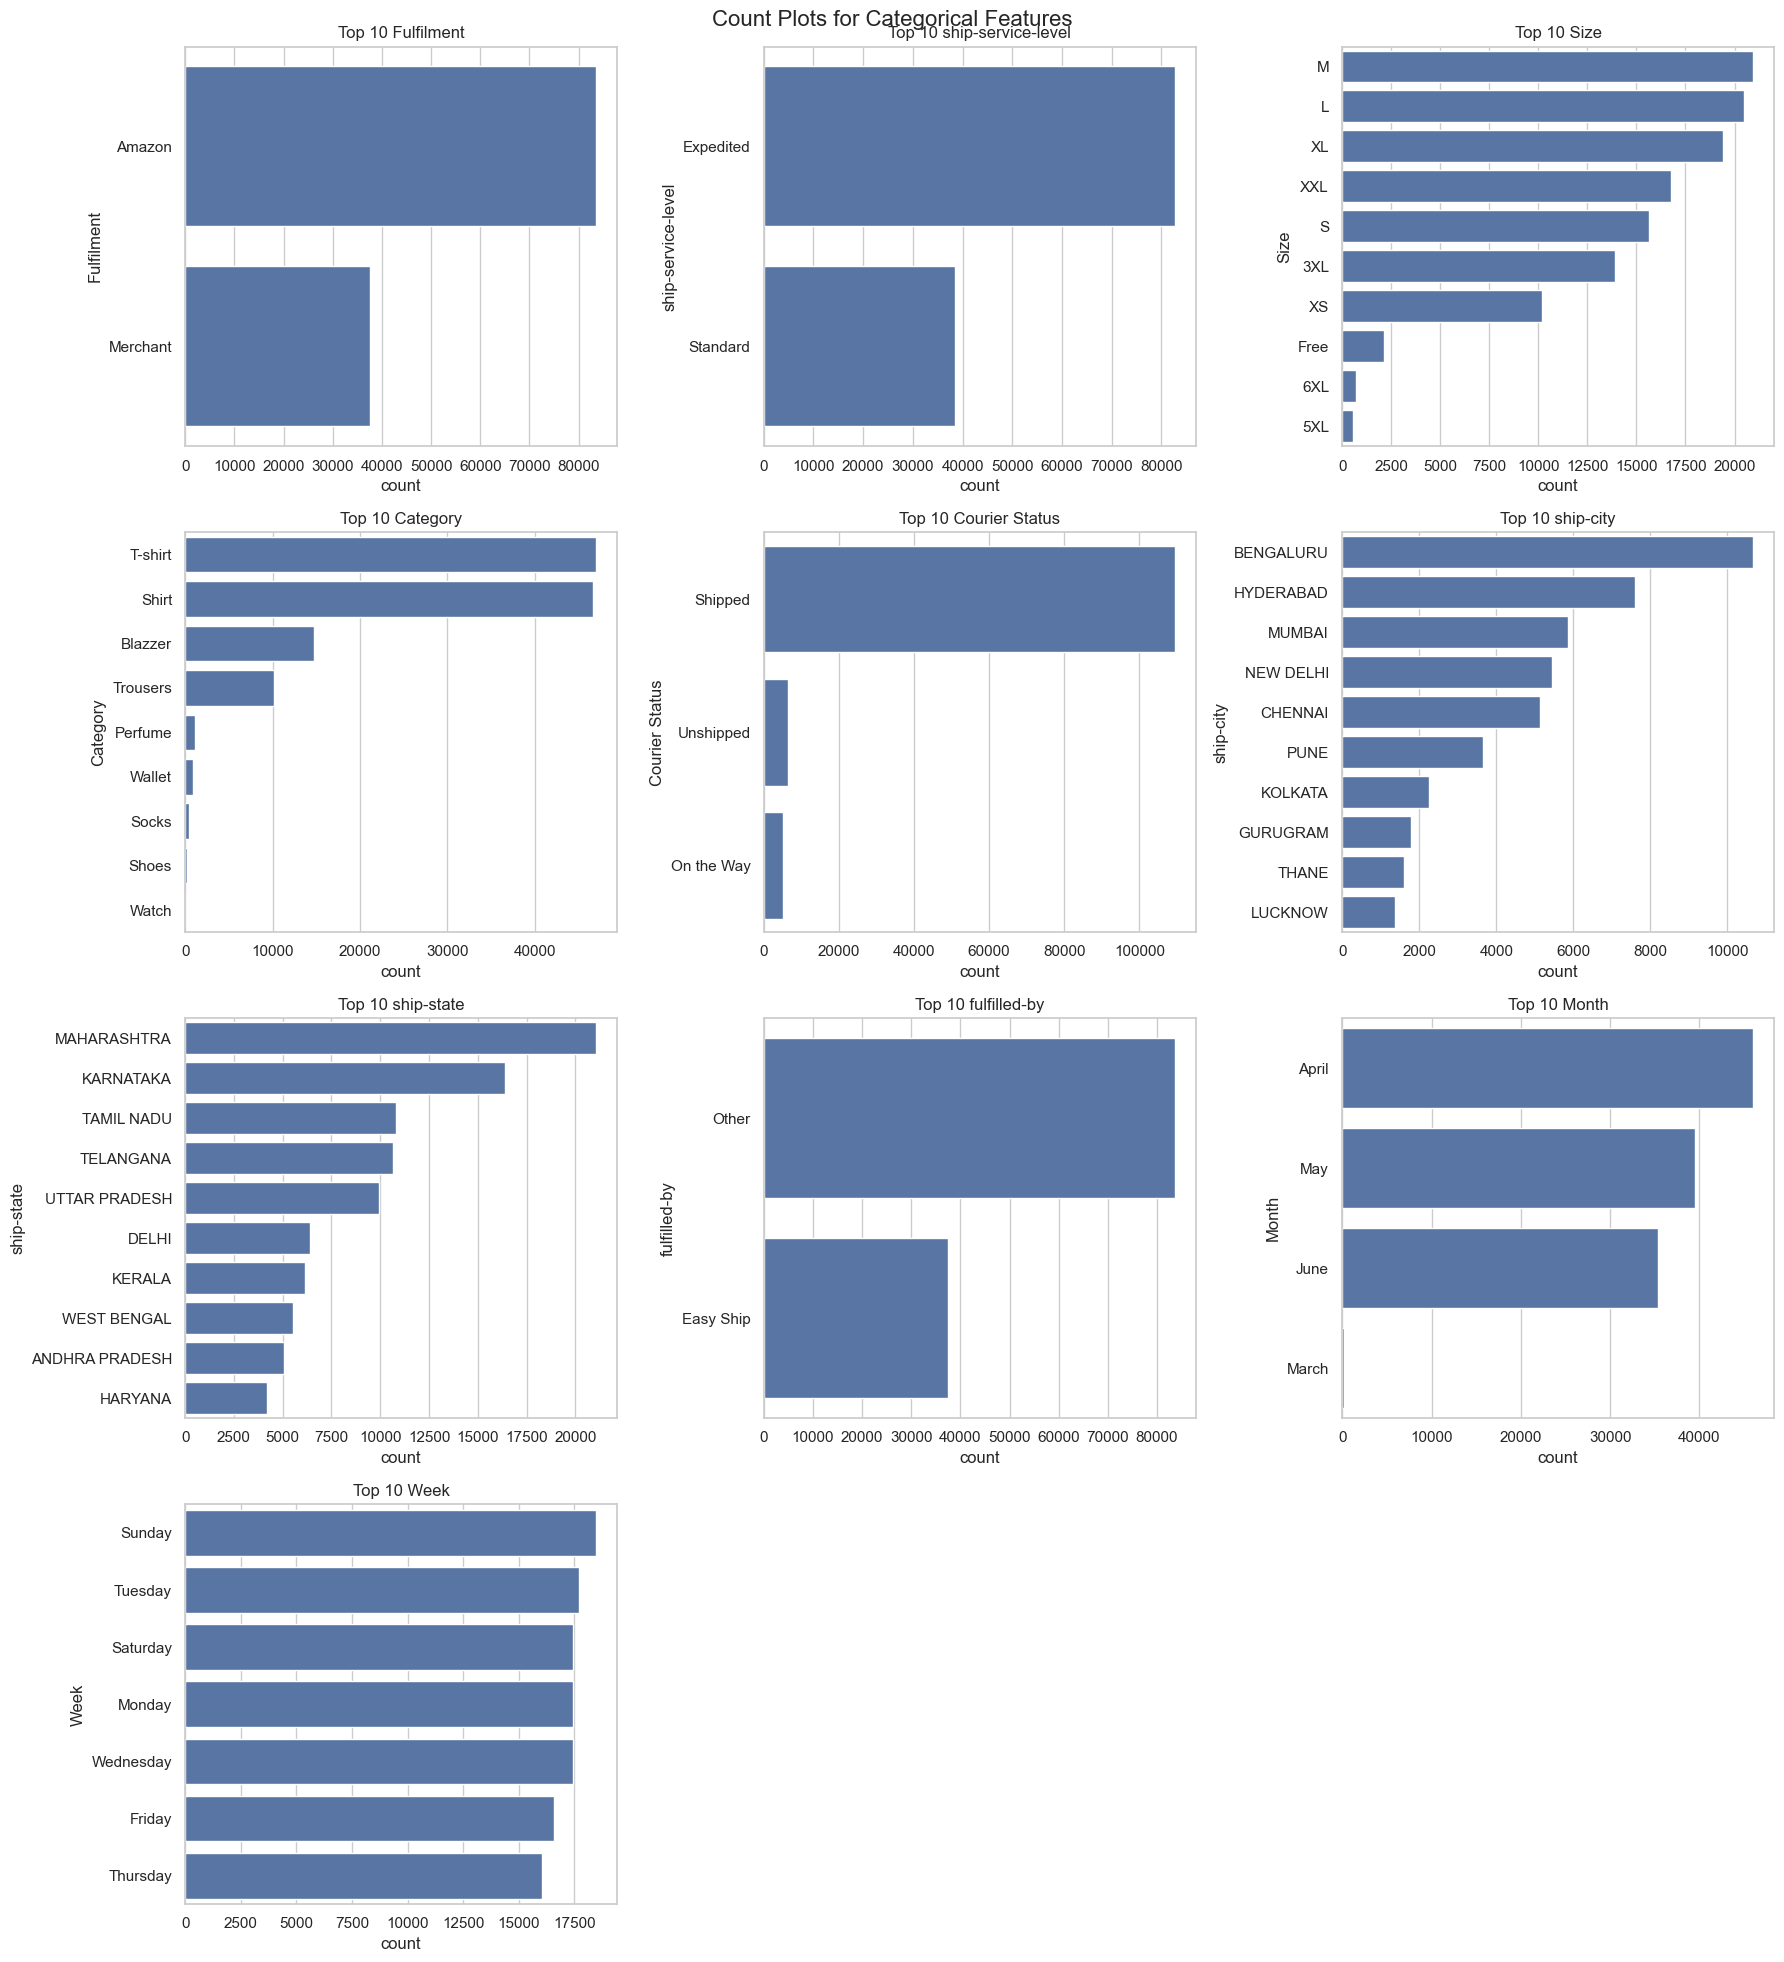

In [16]:
sns.set(style="whitegrid")

# Define columns
numerical_cols = ["Qty", "ship-postal-code"]
categorical_cols = ["Fulfilment", "ship-service-level","Size", "Category", "Courier Status", 
                    "ship-city", "ship-state", "fulfilled-by", "Month", "Week"]

# Determine subplot layout dynamically
n_cols = 3  # Number of columns per row
n_rows = -(-len(categorical_cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))  # Adjust height dynamically
fig.suptitle("Count Plots for Categorical Features", fontsize=16)

# Flatten axes for easy indexing if there are multiple rows
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes[i])  # Show top 10 categories
    axes[i].set_title(f"Top 10 {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
